## 🔮 Perceptron

Any linear decision boundary takes the form
$$f(x) = w^T  \cdot u = w_1*x_1+w_2*x_2+...+w_n*x_n+w_o= 0$$

That is, any linear classifier (e.g., LDA, MDC, Logistic, etc.) after training is equivalent to a setting of $w_o, w_1, w_2, ..., w_n$. We have indeed proven this equivalence for LDA and MDC by finding the $w_i$ by derivation from the decision function.

The Perceptron, SVM and Logistic Regression are some algorithms that explictly find these weights during training (i.e., the weights appear directly in the decision function and are estimated during training).

In case of the Perceptron, the decision function is

$$ŷ  = f(u)=sign(w^T  \cdot u) = sign(w_1*x_1+w_2*x_2+...+w_n*x_n+w_o)$$

- From this we can conclude returns ${+1}$ if the point is above the hyperplane (i.e., $w^T  \cdot u > 0$) and ${-1}$ if it's below the hyperplane (i.e., $w^T  \cdot u < 0$)

- It follows that the Perceptron assumes the labels to be in $y∈\{-1,+1\}$


$\text{Perceptron Training}$

- Initialize $w$ randomly and choose a positive learning rate $η$
- Until converged:
    -  Pick a point $(x_m, y_m)$ (e.g., randomly) 
    - Apply the following decision rule
$$w_{t+1} = w_t + η(y_m-f(u_m))*u_m$$

That's it, it can be mathematically proven that if the data is linearly separable, then the Perceptron will converge to a solution with $100\%$ training accuracy (i.e., perfectly separates the data). Otherwise, we will have to force it to stop under some condition (e.g., using training accuracy or number of iterations).

In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from Plot import plot_model_contours

import warnings
warnings.filterwarnings("ignore")

# 1. Generate two separable blobs of data
x_data, y_data = make_blobs(n_samples=300, centers=2, n_features=2, center_box=(-3, 7), cluster_std=0.8, random_state=42)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=41)

# 3. Create a Perceptron classifier 
perceptron = Perceptron(n_iter_no_change=8, random_state=42)

# 4. Train the classifier on the training data
perceptron.fit(X_train, y_train)

Perceptron(n_iter_no_change=8, random_state=42)

Hyperparameters: 100%|██████████| 4/4 [00:00<00:00,  7.52it/s]


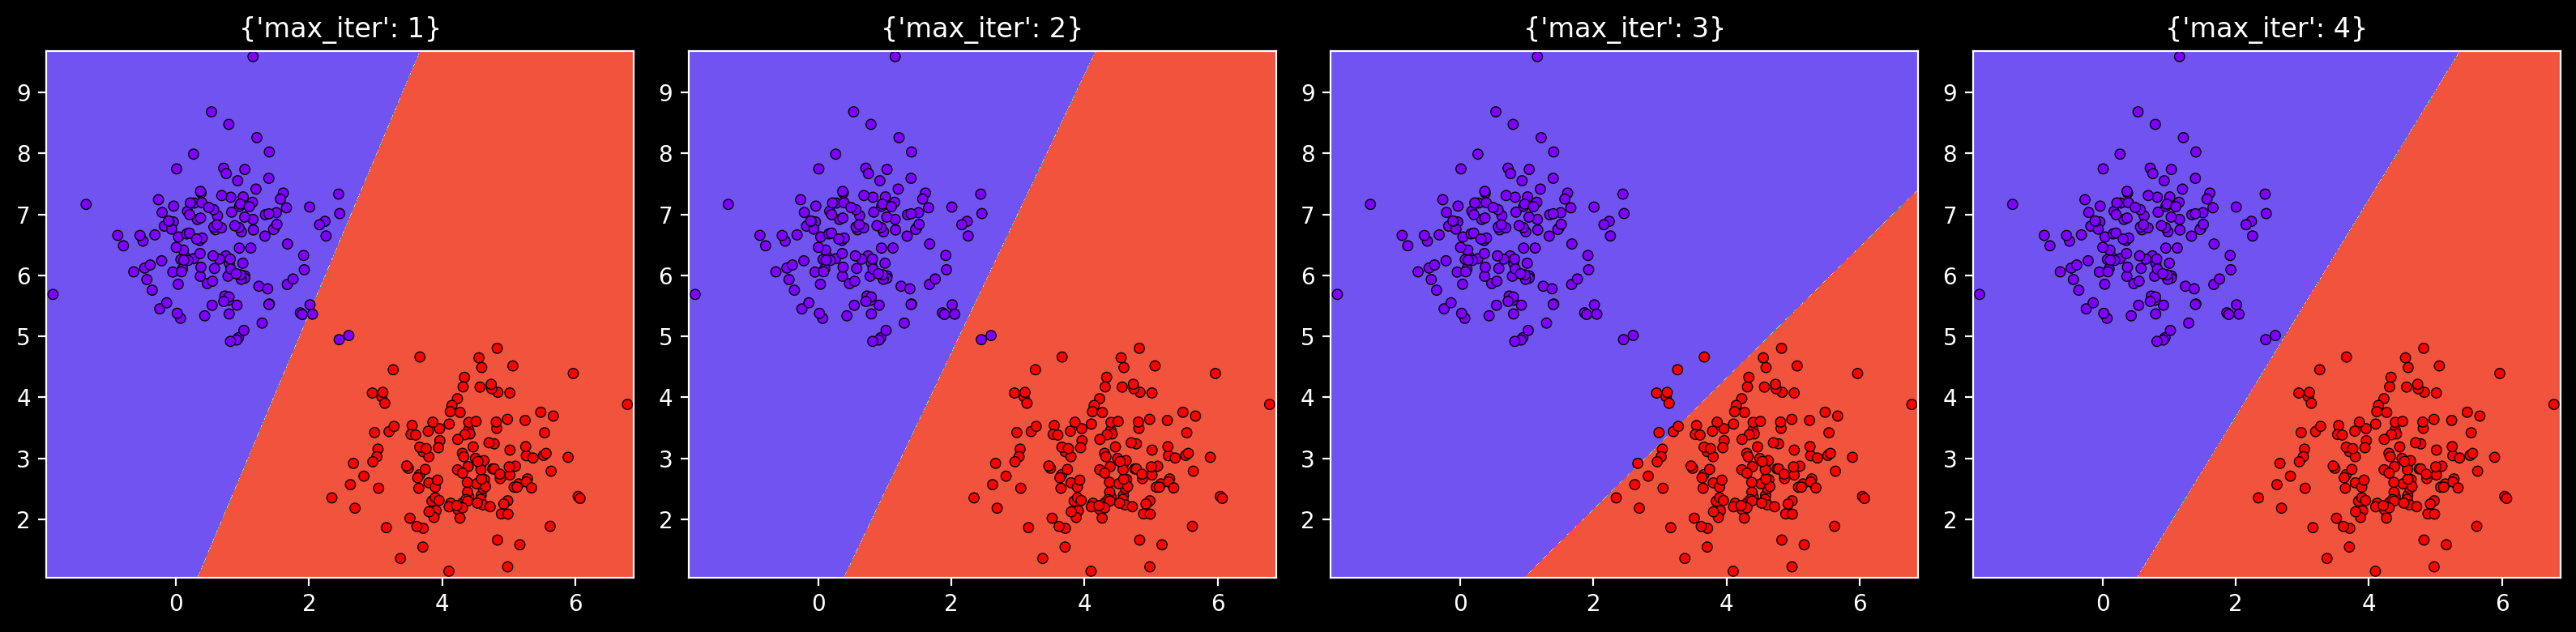

In [2]:
hyperparams_list = [{"max_iter": i} for i in range(1, 5)]
plot_model_contours(perceptron, x_data, y_data,  hyperparams_list)

## 🔴 │ 🔵 Support Vector Machine

Support Vector Machine is another machine learning model that uses the same decision function as the Perceptron

$$ŷ  = f(u)=sign(w^T  \cdot u) = sign(w_1*x_1+w_2*x_2+...+w_n*x_n+w_o)$$


It simply makes the following realization: better than converging on the first hyperplane that separates the classes is to converge on the hyperplane that lies exactly midway between the the classes. You can easily show that it would generalize better and be more robust to noise this way.

**This is equivalent to choosing the hyperplane (i.e., $w, b$) that:**

- Maximizes the distance to the nearest point (i.e., $\min_{m} \frac{|w^tx_m + b|}{||w||}$) (i.e., the margin/2)

- Among all hyperplanes that separate the two classes (i.e., where $y_n(w^Tx_m + b)>0 \;  ∀ m$ holds)

In other words, use an optimization algorithm to solve the following optimization problem and use the resulting $w,b$:

$$ \max_{w,b} \min_{m} \frac{|w^tx_m + b|}{||w||} \;  \text{such that} \;  y_m(w^Tx_m + b)>0 \;  ∀ m $$

This can involve plenty of mathematics depending on how it's done but also results in meaningful insights such as:

- The decision boundary is only defined by some points in the training set which we call support vectors (they support the hyperplanes)

  - That is, removing the other points and restarting training changes nothing

Meanwhile, the word "machine" is because is related to it being a "machine learning" algorithm

In [3]:
from sklearn.svm import LinearSVC, SVC
warnings.resetwarnings()

# Generate two separable blobs of data
x_data, y_data = make_blobs(n_samples=300, centers=2, n_features=2, center_box=(-3, 7), cluster_std=0.8, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=41)

# Create a LinearSVC classifier
linear_svm_classifier = LinearSVC(loss='hinge', C=10e6, random_state=42)

# Train the classifier on the  training data
linear_svm_classifier.fit(X_train, y_train)

/opt/anaconda3/envs/M1/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=10000000.0, loss='hinge', random_state=42)

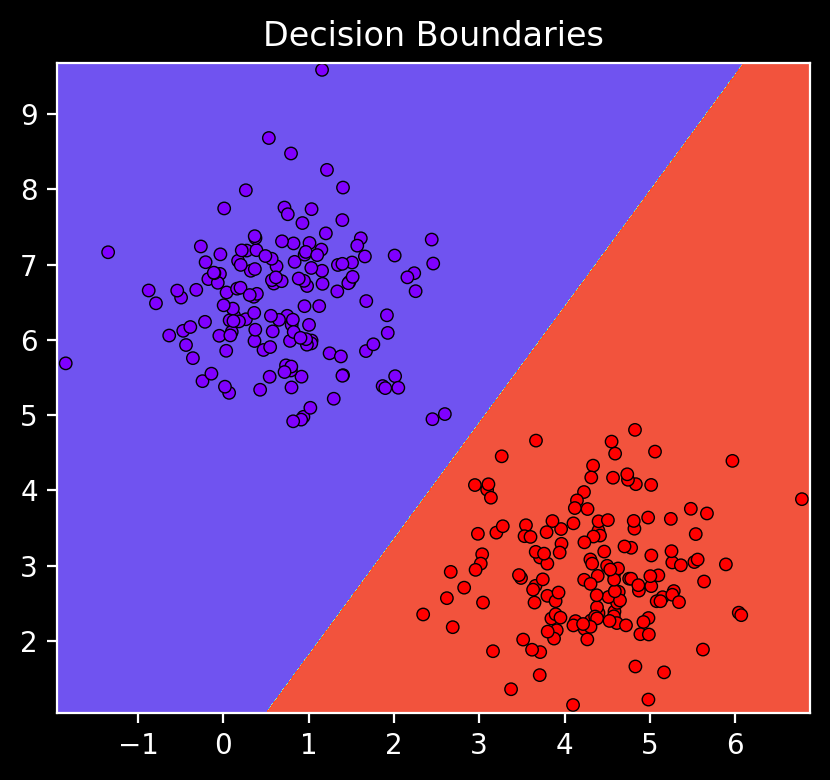

In [4]:
plot_model_contours(linear_svm_classifier , x_data, y_data,  trained=True)

This is the SVM algorithm as was initially developed. 
|<img src="https://i.imgur.com/2SqehrD.png" width=300>                                                |    Notice that like the Perceptron it assumes that there MUST be a separating hyperplane;<br> otherwise, fails to find a solution (i.e., can't find the line on the left).                                                            |
|--------------------------------------------------------------|----------------------------------------------------------------|


- Hence, it is called *"Hard Margin SVM"*

- They then developed *"Soft Margin SVM"* which allows the final model to *make mistakes* while *penalizing and minimizng these mistakes* by modifying (a simplified form) of the optimization problem:

$$ \min_{w,b,\xi} \frac{1}{2} ||w||^2 \;\; \text{such that} \quad y_m (w^Tx_m + b) \geq 1 \; \forall m \quad→\quad  \min_{w,b,\xi} \frac{1}{2} ||w||^2 + C \sum_{m=1}^{M} \xi_n \;\; \text{such that} \quad y_m (w^Tx_m + b) \geq 1 - \xi_m \; \forall m $$


- The SVM hyperparameter $C$ decide how much to penalize errors (it weights them  in the optimization problem):

  - **Large C** means to try hard to avoid errors (i.e., approaches hard-margin)
  
  - **Small C** means to be more tolerant to errors (i.e., allow some points; e.g., noise to make errors)



In summary, with soft-margin SVM (with low-ish $C$ value):

- Cases with no solution can now have a solution  ✅
     
- Model is less likely to overfit the data (i.e., get high accuracy when it's in fact minimizing distance to noise) 🤔

<img src="https://i.imgur.com/GjrR8pS.png" width="500">

As C decreases the model's ability to fit the data perfectly decreases so it acts as a regularization

Hyperparameters:   0%|          | 0/4 [00:00<?, ?it/s]/opt/anaconda3/envs/M1/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Hyperparameters:  25%|██▌       | 1/4 [00:00<00:00,  5.06it/s]/opt/anaconda3/envs/M1/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Hyperparameters:  50%|█████     | 2/4 [00:00<00:00,  4.99it/s]/opt/anaconda3/envs/M1/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/envs/M1/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarn

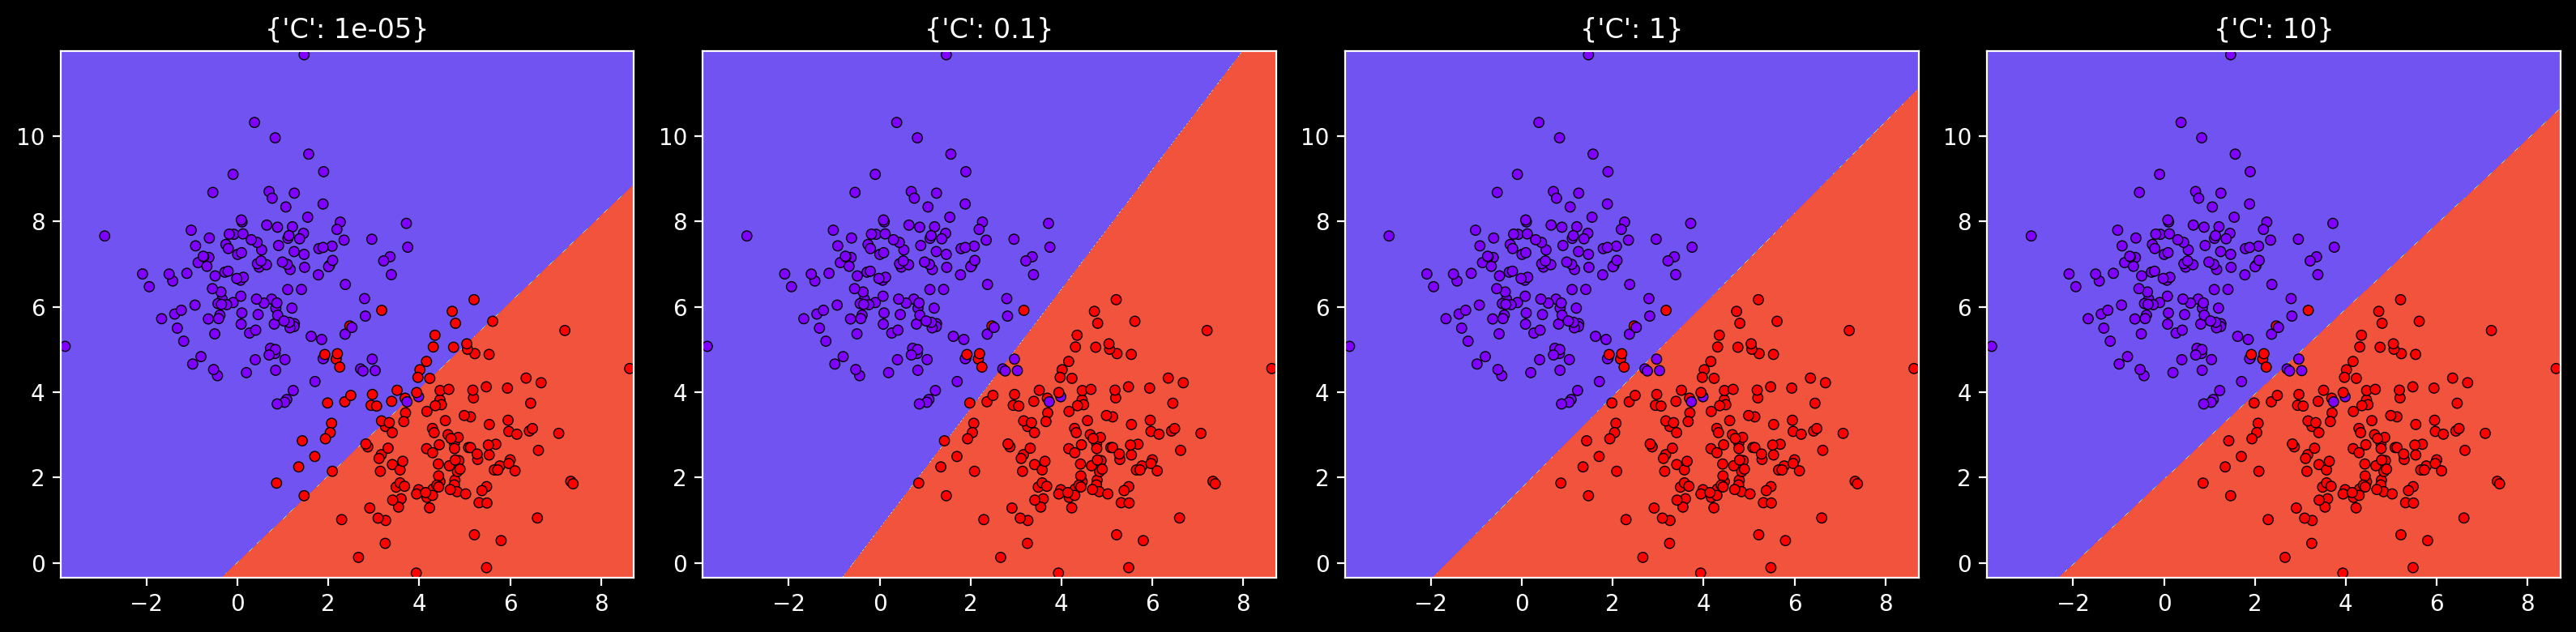

In [5]:
x_data, y_data = make_blobs(n_samples=300, centers=2, n_features=2, center_box=(-3, 7), cluster_std=1.4, random_state=42)

hyperparams_list=[{"C": 1e-5}, {"C": 1e-1}, {"C":1}, {"C":10},]

plot_model_contours(linear_svm_classifier , x_data, y_data, hyperparams_list, trained=False)

By increasing C, we make convergence harder as it makes the model try more to avoid errors. For very large $C$, convergence may fail no matter the number of iterations (hard margin).

## 🪄 The Kernel Trick

- Used to make many linear models operate on nonlinear data (e.g., Perceptron, PCA, SVM)

   - Most used for SVM (implemented for SVMs in Scikit-learn in `sklearn.svm.SVC`)

   <img src="https://i.imgur.com/oPqU4Nr.png" width=800>

1. Transform points into a new space where they become more linear (or perfectly linear!) → Bless of Dimensionality

2. Fit the model in that space

3. Prediction are also cast to that space first

4. Casting the linear boundary into the lower space will show a nonlinear boundary (i.e., hence it helps make models nonlinear)

The kernel function decides the transformation to the new space:
| Kernel Function | Formula                                      | Transformation                                                |
|-----------------|----------------------------------------------|------------------------------------------------------------|
| Linear          | $K(x_i, x_j) = x_i^T x_j   $                  | Nothing   |
| Polynomial      | $K(x_i, x_j) = (x_i^T x_j + c)^d  $           | Terms of multivariate polynomial in a vector |
| Radial Basis Function (RBF) | $K(x_i, x_j) = exp(-γ \|\|x_i - x_j\|\|^2)$ | Can be derived via Taylor series |


In [6]:
from sklearn.svm import LinearSVC, SVC
warnings.resetwarnings()

# Generate two separable blobs of data
x_data, y_data = make_moons(n_samples=300, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=41)

# Create a LinearSVC classifier
svm_classifier = SVC(C=0.1, random_state=42)

# Train the classifier on the  training data
svm_classifier.fit(X_train, y_train)

SVC(C=0.1, random_state=42)

Hyperparameters:   0%|          | 0/3 [00:00<?, ?it/s]

Hyperparameters: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


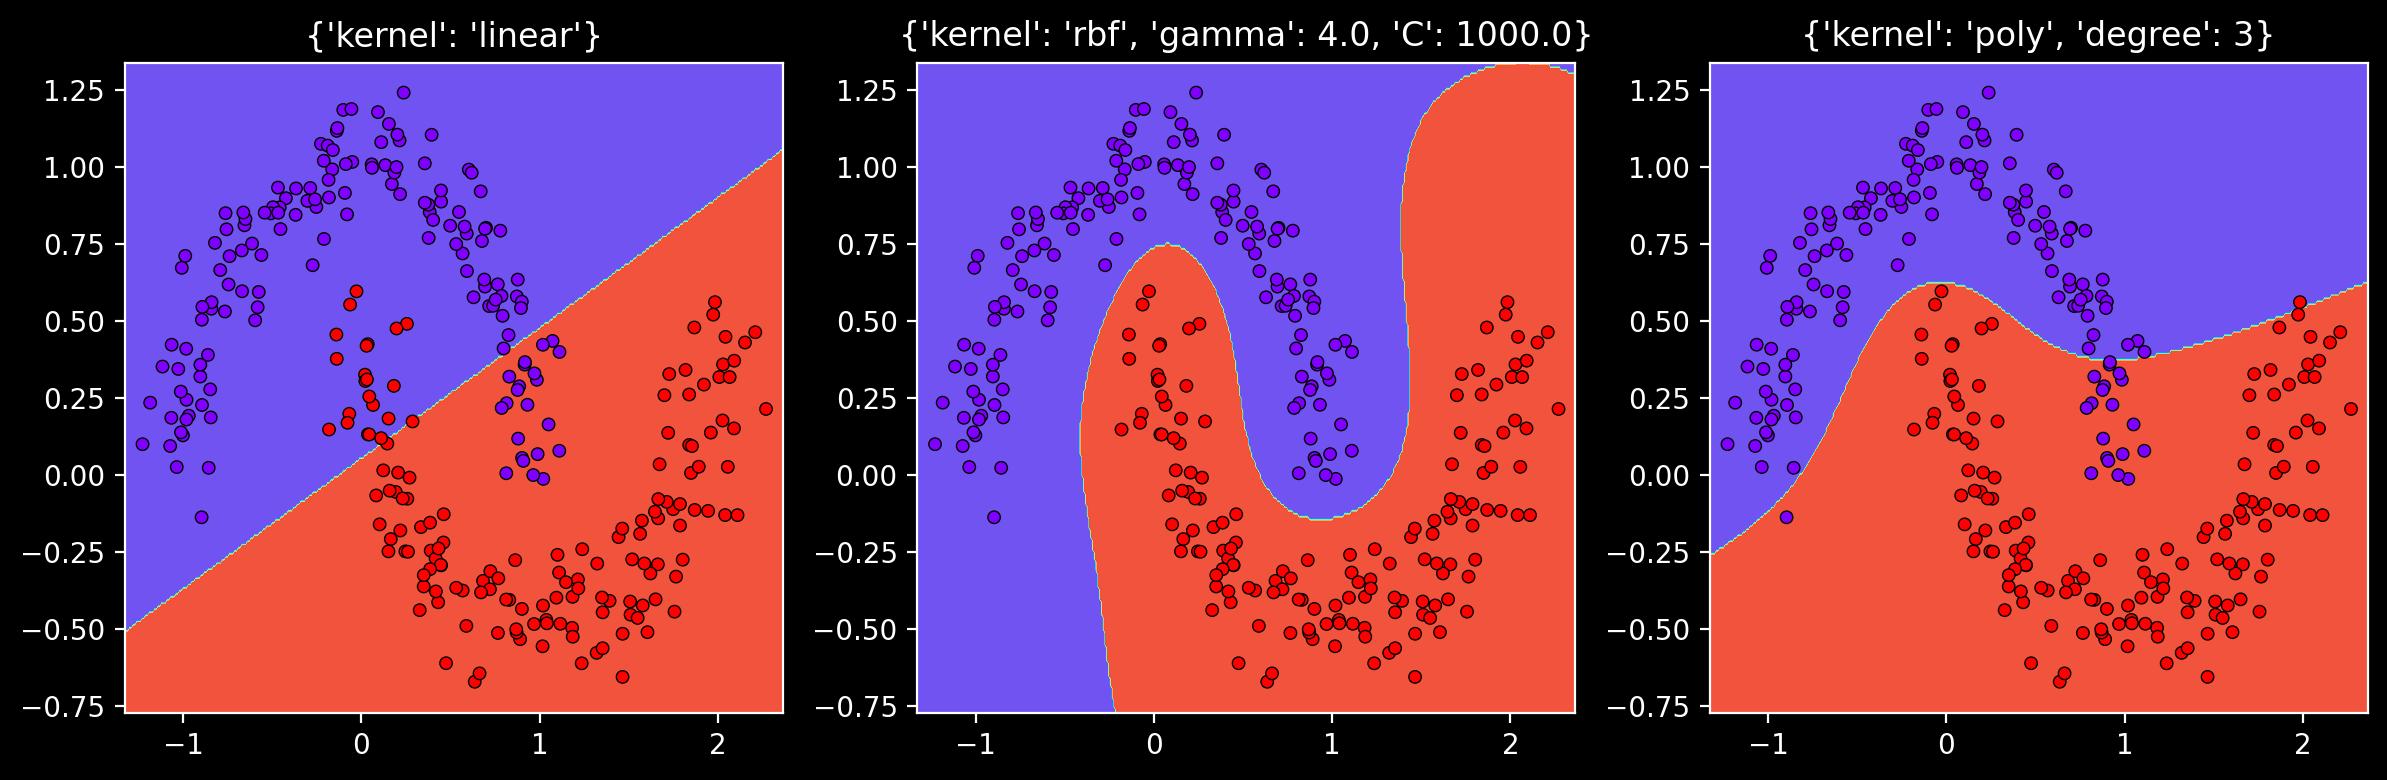

In [7]:
hyperparams_list=[{"kernel": "linear"}, {"kernel": "rbf", "gamma":4.0, "C":10e2}, {"kernel":"poly", "degree":3},]

plot_model_contours(svm_classifier , x_data, y_data, hyperparams_list, trained=False)

This makes SVMs powerful: they can give great nonlinear fits without making strong assumptions on your data contrary to many other machine learning models.

#### 🍫 Question: increase or decrease C for a better fit in the middle plot?